In [23]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
from __future__ import print_function
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.legend_handler import HandlerLine2D
#from scipy.stats import norm
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from scipy import integrate
import mplhep as hep
hep.set_style(hep.style.CMS)

params = {'legend.fontsize': '30',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'40',
         'ytick.labelsize':'40',
         'axes.labelsize': '30',
         'axes.titlesize': '40'}
#plt.rc_params[axis='y', which='both')
plt.style.use(hep.style.CMS)
plt.rcParams.update(params)
plt.rcParams['xtick.major.size'] = 20
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2


plt.rcParams['ytick.major.size'] = 20
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['ytick.minor.width'] = 2


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#ax1.tick_params('both', length=20, width=2, which='major')
#ax1.tick_params('both', length=10, width=1, which='minor')

In [24]:
import plots
## ANALYZING THE INSERT WITH TUNGSTEN + STEEL DATA
FilePathReco="/home/bishnu/EIC/Data/hepmc/HCAL/FTFP_BERT_HP/"
#FilePathReco="/home/bishnu/EIC/Data/hepmc/HCAL/"
## PATH WHERE FIGURE ARE SAVED  
PathToPlot='/home/bishnu/UCR_EIC/Plots/'        
Time_Threshold=200 #ns

#MIP=0.8#MeV for CALICE Analysis
MIP=0.6 # MeV for Hcal insert 

Gev_To_MeV=1000
Sigma_For_leakage=3
Mean_pions=[]
Mean_electrons=[]
Energy_Threshold=0.1*MIP  #(0.5 * MIP for calice analysis)
FIT_SIGMA=3
theta=2.83
#theta=2.25
eta=plots.get_eta(theta)
print(eta)


3.7011990881145413


### Compare the Guassian plot for HCALI with W only and W-Fe

HELLO JELLO 5000
HELLO JELLO 5000


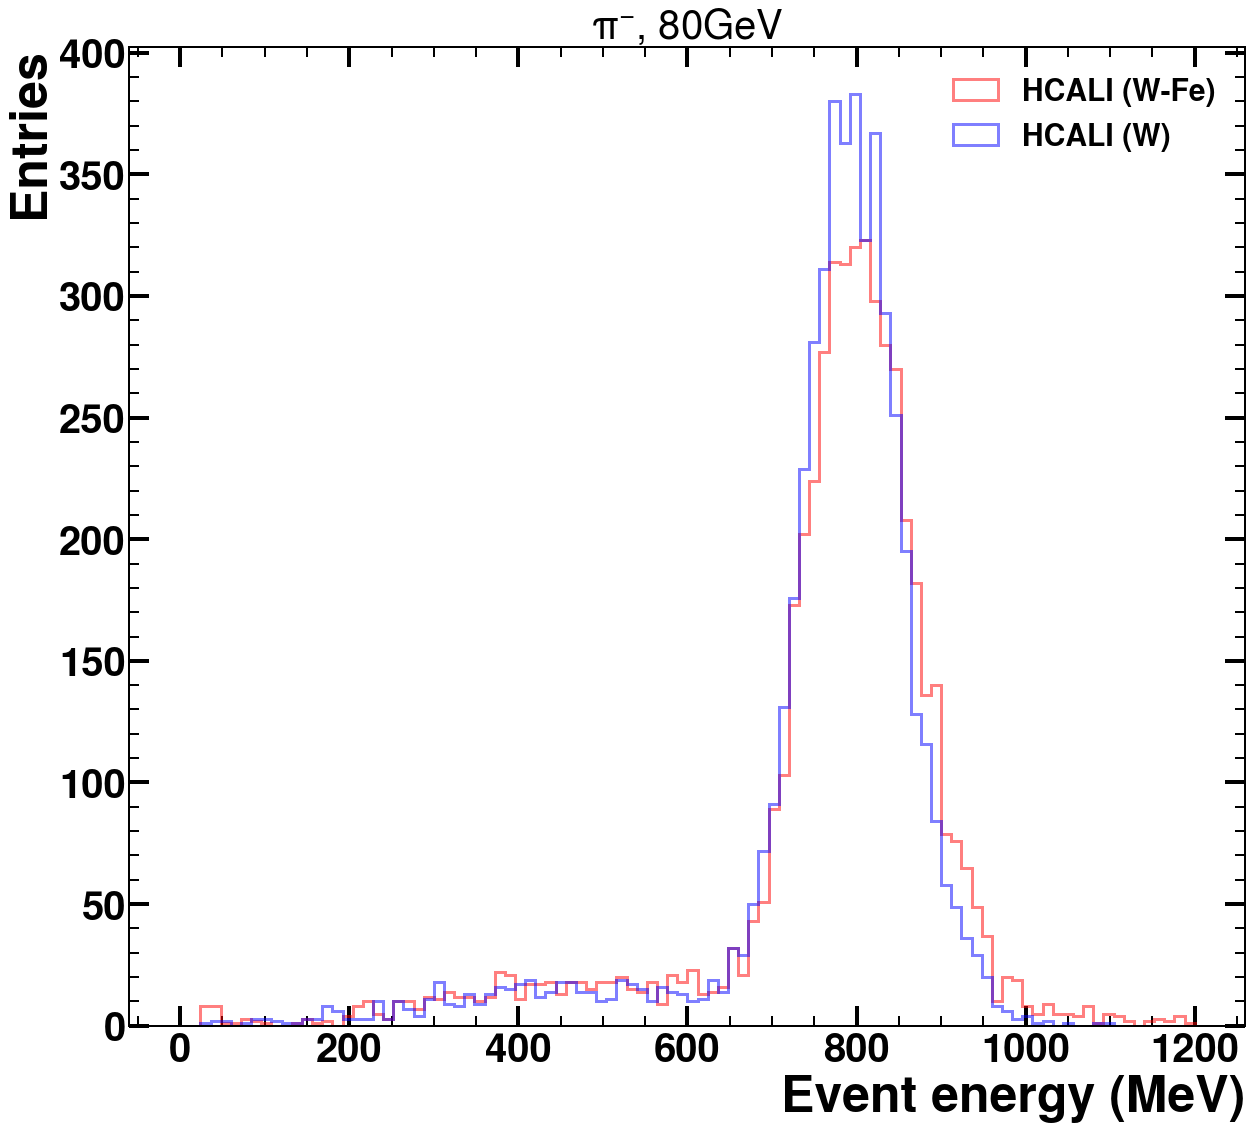

HELLO JELLO 5000
HELLO JELLO 5000


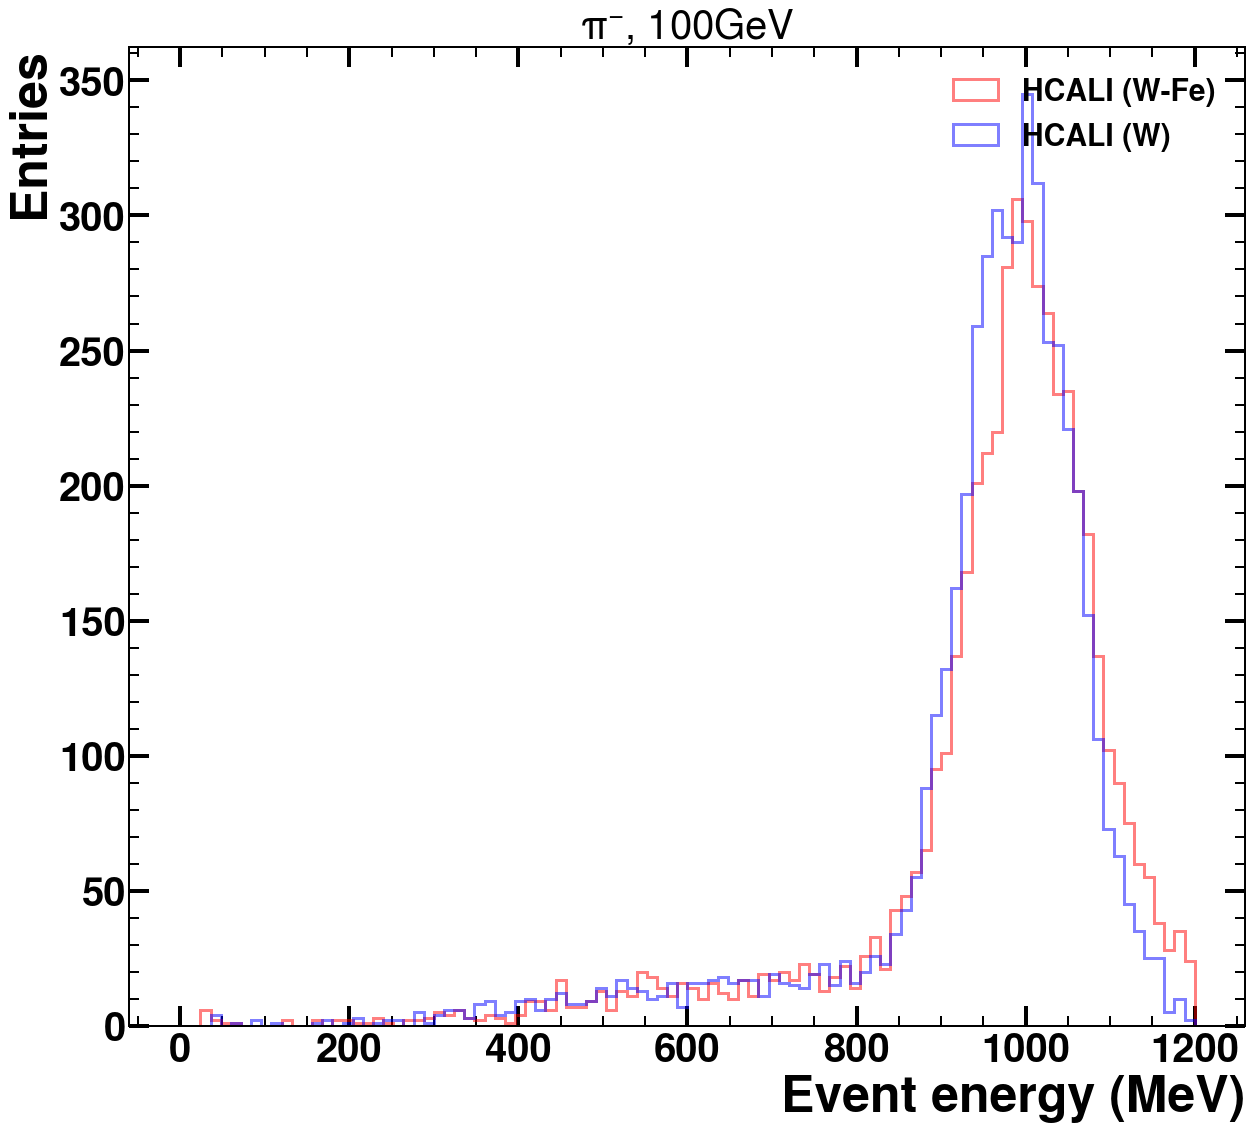

In [12]:
def get_fitted_mean_std():
   
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(1/10 of event is selected)
    energies=[20,50]#,30,40,50,60,80]
    #energies=[30] #,20,30,40,50,60,80,100]
    fileindex_W="deg" ## for insert file or HCAL orginal file
    fileindex_W_Fe="deg_Fe-W" ## for insert WITH W 30 LAYER AND FE 20 LAYERS
    nbins=100
    max_range=1200
    
    particle='pi-'
    greek_particle=plots.get_greek_particle(particle) 
   
    
    
    for ienergy in energies:
        
       
        fig,ax = plt.subplots(1,1,figsize=(20,18),sharey=True,sharex=True)
        
        ## FOR THE HCAL Insert mixture W-Fe
        ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
        phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex_W_Fe,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        
        ## COMPUTE THE SUM OF W-FE INSERT
        ene_total_wFe = ak.sum(ene_good_wFe,axis=-1)
        ene_average = ak.mean(ene_good_wFe,axis=-1)
        mean_guess_wFe=np.mean(ene_total_wFe)
        sigma_guess_wFe=np.std(ene_total_wFe)
        
        
        
        
        count_wFe, bins_wFe,_= ax.hist(np.array(ene_total_wFe),bins=nbins,alpha=0.5,range=(0,max_range),\
                                                    label='HCALI (W-Fe)',linewidth='3',color='red', histtype='step')
        binscenters_wFe = np.array([0.5 * (bins_wFe[i] + bins_wFe[i+1]) for i in range(len(bins_wFe)-1)])
           
        mask_wFe=(binscenters_wFe>(mean_guess_wFe-FIT_SIGMA*sigma_guess_wFe)) & \
            (binscenters_wFe<(mean_guess_wFe+FIT_SIGMA*sigma_guess_wFe))
        

        
        
        ##Now for the tungsten only 
        
        
        ## FOR THE HCAL reading
        ene_w,time_w,PosRecoX_w,PosRecoY_w,PosRecoZ_w,mass_w,mom_w,energy_gen_w, phi_w,ene_good_w\
        =plots.read_rootfile_HCAL_Insert(fileindex_W,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        ## COMPUTE THE SUM OF W ONLY INSERT
        ene_total_w = ak.sum(ene_good_w,axis=-1)
        ene_average = ak.mean(ene_good_w,axis=-1)
        mean_guess_w=np.mean(ene_total_w)
        sigma_guess_w=np.std(ene_total_w)
        
        
        
        
        count_w, bins_w,_= ax.hist(np.array(ene_total_w),bins=nbins,alpha=0.5,range=(0,max_range),\
                                                    label='HCALI (W)',linewidth='3',color='blue', histtype='step')
        
        binscenters_w = np.array([0.5 * (bins_w[i] + bins_w[i+1]) for i in range(len(bins_w)-1)])
        
        mask_w=(binscenters_w>(mean_guess_w-FIT_SIGMA*sigma_guess_w)) & (binscenters_w<(mean_guess_w+FIT_SIGMA*sigma_guess_w))
        
        
        
        
        ax.set_xlabel("Event energy (MeV)",fontsize=50)
        ax.set_ylabel("Entries",fontsize=50)
        ax.set_title("{0}, {1}GeV".format(greek_particle,ienergy))
        
        plt.legend(loc='upper right')
        plt.show()
        
        
get_fitted_mean_std()        

## For resolution and leakage for constant rapidity as function of Energy

HELLO JELLO 5000


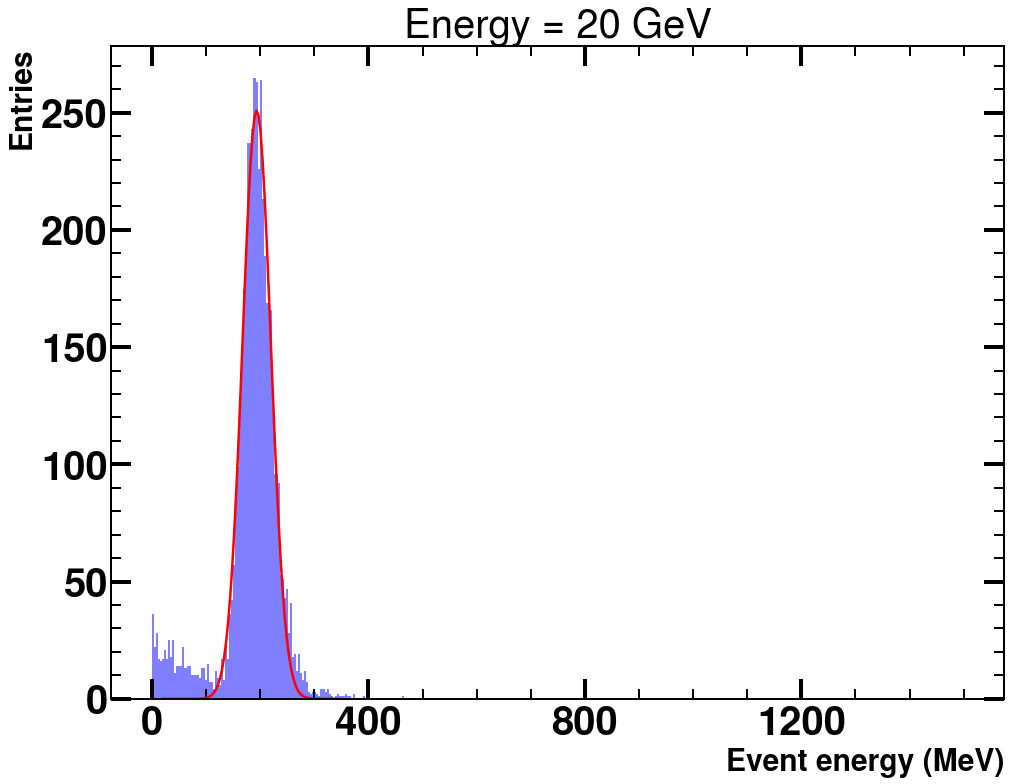

HELLO JELLO 5000


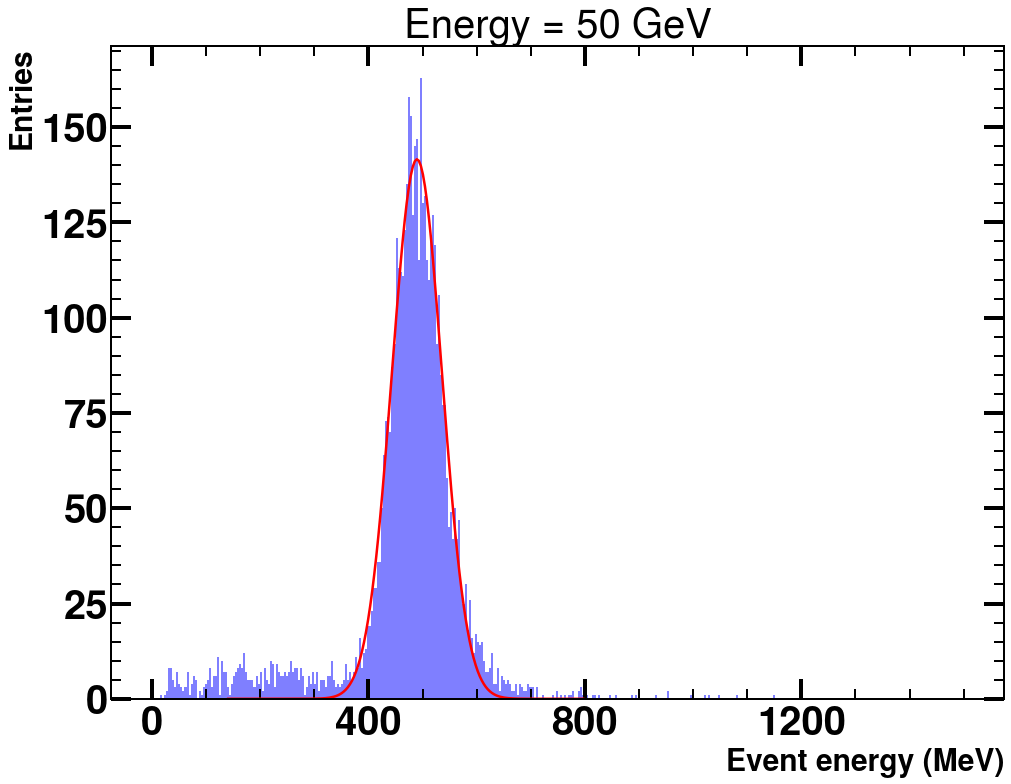

pi_means_Hp=[193.38,489.62 ]
pi_means_error_Hp=[0.532,0.687 ]
pi_stds_Hp=[ 26.12,46.07 ]
pi_stds_error_Hp=[ 0.532,0.687 ]
pi_leaks_per_Hp=[ 9.480,9.480 ]
pi_leaks_per_error_Hp=[ 0.4556,0.4556 ]
pi_resolutions_Hp=[ 0.13507,0.09409 ]
pi_resolutions_errors_Hp=[ 0.0028,0.0014 ]


In [26]:
def get_fitted_mean_std():
   
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(1/10 of event is selected)
    #energies=[10,20,30,40,50,60,80,100]
    #energies=[10,20,30,40,50,60,80, 100]
    fileindex="deg" ## for insert file or HCAL orginal file
    #fileindex="deg_Fe-W" ## for insert WITH W 30 LAYER AND FE 20 LAYERS
    if fileindex=='deg':
        prefix='W'
    elif fileindex=='deg_Fe-W':
        prefix='FeW'
    #energies=[10,20,30,40,50,60,80]
    energies=[20,50]
    particle='pi-'
    for ienergy in energies:
        
               
        ## FOR THE HCAL reading
        ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
        phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error,\
        pi_resolution,pi_resolution_error=plots.get_resolution(ene_good_wFe, ienergy, particle, Sigma_For_leakage)  
        
        
        
        
        
        pi_means.append(pi_mean)
        pi_stds.append(pi_std)
        pi_means_error.append(pi_mean_error)
        pi_stds_error.append(pi_sigma_error)
        pi_resolutions.append(pi_resolution)
        pi_resolution_errors.append(pi_resolution_error)
        pi_leaks_per.append(pi_leak_per)
        pi_leaks_per_error.append(pi_leak_per_error)
        
    plots.print_decimal_pi_update('Hp', particle, pi_means,  pi_means_error,  pi_stds,pi_stds_error, pi_leaks_per, \
                           pi_leaks_per_error, pi_resolutions, pi_resolution_errors)     
get_fitted_mean_std()  


## Resolution HCAL Insert  (51 W layers, 16 mm W + 3mm Sc

In [22]:
energies_pi=[10,20,30,40,50,60,80, 100]
energies_el=[10,20,30,40,50,60,80]

## ONLY TUNGSTEN ABSORBER 16 MM + 3MM SC
pi_means_W=[97.25,196.72,294.79,395.58,493.20,592.98,794.22,991.64 ]
pi_means_error_W=[0.354,0.537,0.524,0.583,0.696,0.750,0.895,1.081 ]
pi_stds_W=[ 17.29,25.11,31.70,36.07,42.73,47.55,56.82,66.85 ]
pi_stds_error_W=[ 0.354,0.537,0.524,0.583,0.696,0.750,0.895,1.081 ]
pi_leaks_per_W=[ 9.960,10.560,9.660,10.440,9.440,9.720,9.380,10.560 ]
pi_leaks_per_error_W=[ 0.4680,0.4832,0.4603,0.4802,0.4546,0.4618,0.4530,0.4832 ]
pi_resolutions_W=[ 0.17783,0.12763,0.10753,0.09119,0.08663,0.08019,0.07155,0.06742 ]
pi_resolutions_errors_W=[ 0.0037,0.0028,0.0018,0.0015,0.0014,0.0013,0.0011,0.0011 ]

### ELECTTRON 
e_means_W=[86.57,177.42,268.60,359.52,449.59,535.37,671.58 ]
e_means_error_W=[0.349,0.371,0.395,0.505,0.412,0.551,0.796 ]
e_stds_W=[ 13.72,19.35,23.25,26.47,28.59,31.83,49.57 ]
e_stds_error_W=[ 0.349,0.372,0.396,0.505,0.412,0.551,0.799 ]
e_leaks_per_W=[ 1.220,0.460,0.820,0.840,0.480,0.660,0.020 ]
e_leaks_per_error_W=[ 0.1572,0.0961,0.1286,0.1302,0.0982,0.1153,0.0200 ]
e_resolutions_W=[ 0.15852,0.10905,0.08657,0.07364,0.06359,0.05945,0.07381 ]
e_resolutions_errors_W=[ 0.0041,0.0021,0.0015,0.0014,0.0009,0.0010,0.0012 ]




## TUNGSTEN (30) + STEEL LAYER (30) ABSORBER 16 MM + 3MM SC
pi_means_FeW=[97.49,197.61,298.72,398.67,497.37,599.48,802.89,1002.94 ]
pi_means_error_FeW=[0.490,0.521,0.602,0.718,0.893,1.077,1.149,1.212 ]
pi_stds_FeW=[ 18.61,27.08,33.92,41.13,46.50,54.08,64.54,73.45 ]
pi_stds_error_FeW=[ 0.490,0.521,0.602,0.718,0.893,1.077,1.149,1.212 ]
pi_leaks_per_FeW=[ 10.500,10.660,10.340,9.900,10.160,9.720,10.286,9.854 ]
pi_leaks_per_error_FeW=[ 0.4817,0.4857,0.4777,0.4665,0.4731,0.4618,0.4765,0.4661 ]
pi_resolutions_FeW=[ 0.19085,0.13705,0.11354,0.10318,0.09350,0.09022,0.08038,0.07324 ]
pi_resolutions_errors_FeW=[ 0.0051,0.0027,0.0020,0.0018,0.0018,0.0018,0.0014,0.0012 ]

### ELECTTRON 
e_means_FeW=[87.01,177.75,269.06,359.55,451.51,535.55,670.76 ]
e_means_error_FeW=[0.334,0.396,0.346,0.327,0.615,0.443,1.014 ]
e_stds_FeW=[ 13.32,18.75,23.11,26.84,29.23,31.59,48.81 ]
e_stds_error_FeW=[ 0.334,0.396,0.346,0.327,0.616,0.443,1.017 ]
e_leaks_per_FeW=[ 0.840,0.700,0.820,0.660,0.800,0.760,0.020 ]
e_leaks_per_error_FeW=[ 0.1302,0.1187,0.1286,0.1153,0.1270,0.1238,0.0200 ]
e_resolutions_FeW=[ 0.15309,0.10549,0.08591,0.07465,0.06473,0.05899,0.07277 ]
e_resolutions_errors_FeW=[ 0.0039,0.0022,0.0013,0.0009,0.0014,0.0008,0.0015 ]



### Plot the leakage HCal Insert  with W only + Mixture of W/Fe
### plots all four at once (HCALI-W_electron, HCALI-WFe_electron, HCALI-W_pi HCALI-WFe_pion

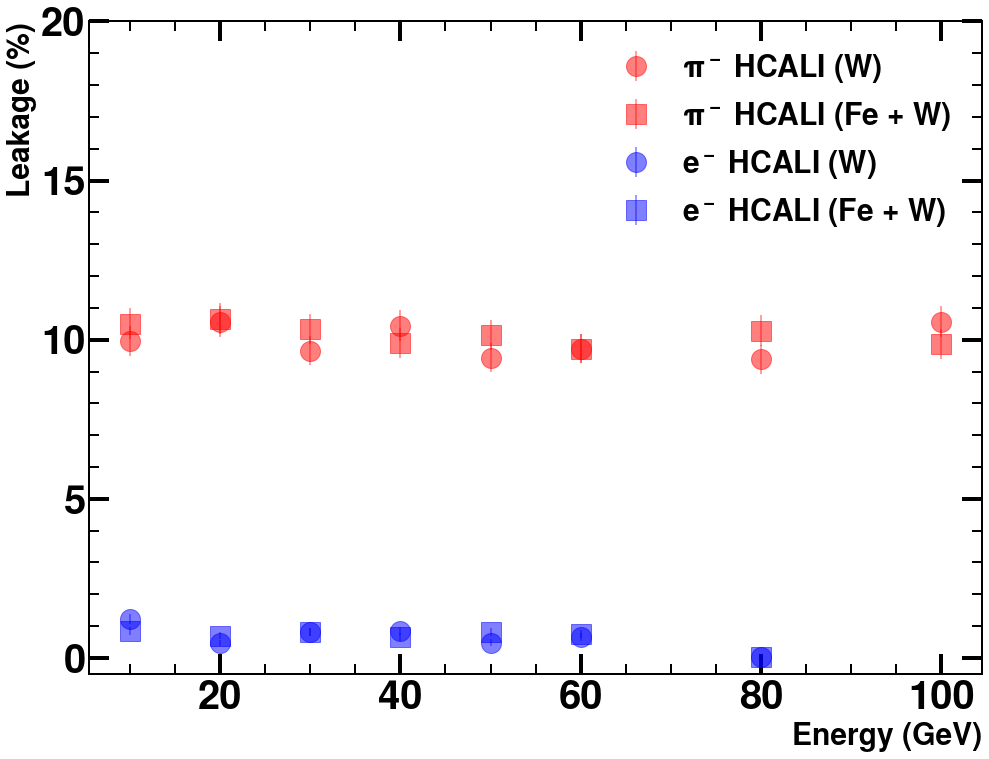

In [26]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(energies_pi,pi_leaks_per_W, pi_leaks_per_error_W ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='$\pi^-$ HCALI (W)',linestyle='None')

ax.errorbar(energies_pi,pi_leaks_per_FeW, pi_leaks_per_error_FeW,color="red",alpha=0.5,marker='s',markersize=20,\
            label='$\pi^-$ HCALI (Fe + W)',linestyle='None' )


ax.errorbar(energies_el,e_leaks_per_W, e_leaks_per_error_W ,color="blue",alpha=0.5,marker='o',markersize=20,\
            label='$e^-$ HCALI (W)',linestyle='None')
            
           
ax.errorbar(energies_el,e_leaks_per_FeW, e_leaks_per_error_FeW,color="blue",alpha=0.5,marker='s',markersize=20,\
            label='$e^-$ HCALI (Fe + W)',linestyle='None' )



ax.set_xlabel("Energy (GeV)")
ax.set_ylabel("Leakage (%)")
ax.set_ylim(-0.5,20)

plt.legend()
plt.show()

## Study of resolution with and without mixtures

## comparese with W only HCALI + W/Fe CALI

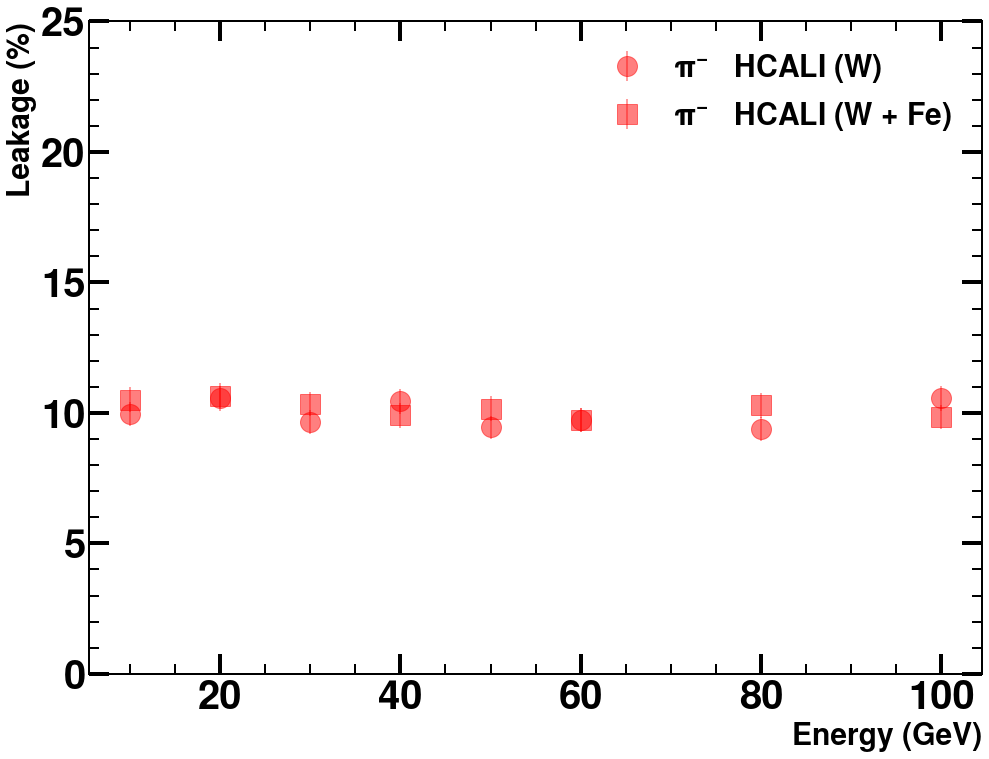

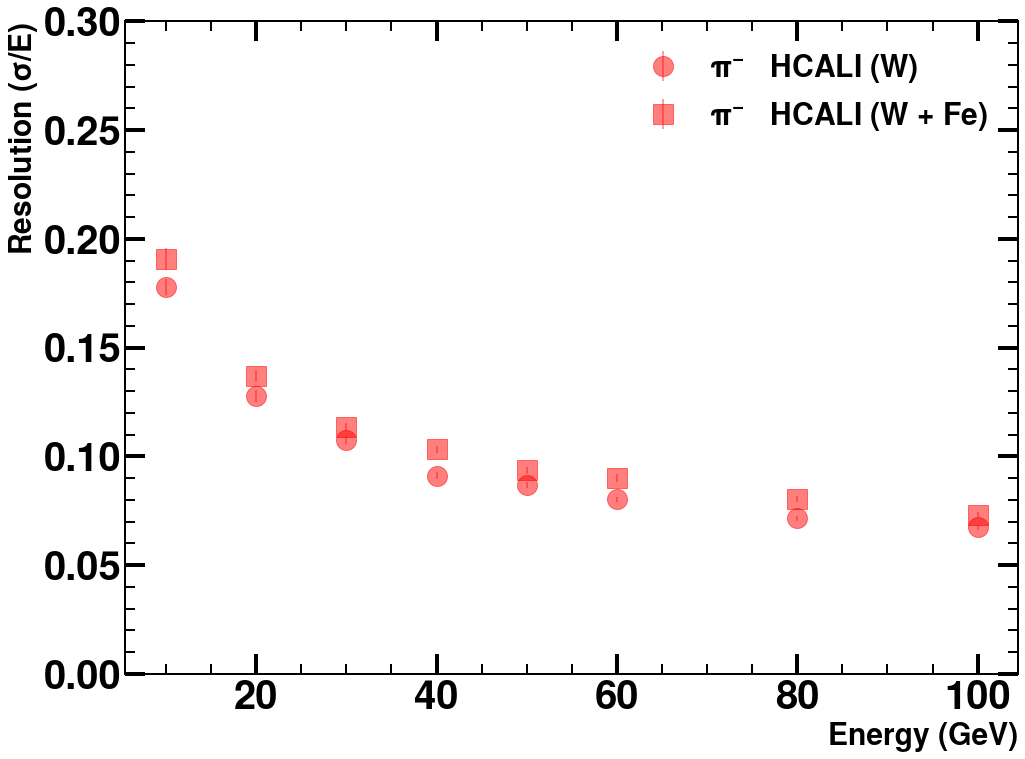

In [37]:

def get_comp_wFe_W_CALI(particle, energies, var_W, var_error_W, var_FeW, var_error_FeW):
    
    if var_W==(pi_resolutions_W) or (var_W== e_resolutions_W):
        Ytitle='Resolution ($\sigma$/E)'
        Ylim=0.30
        
    elif (var_W==pi_leaks_per_W) or (var_W==e_leaks_per_W):
        Ytitle='Leakage (%)'
        Ylim=25
        
    elif (var_W==pi_means_W) or (var_W==e_means_W) :
        Ytitle='Mean Energy (MeV)'
        Ylim=3000
        
    else:
        print("PLEASE CHECK THE VARIABLE INPUT")
            
    
    greek_particle=plots.get_greek_particle(particles)
    
    label_W  =greek_particle +'   '+ 'HCALI (W)'
    label_FeW=greek_particle +'   '+ 'HCALI (W + Fe)'
    
    fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    
    ax.errorbar(energies,var_W, var_error_W ,alpha=0.5,color="red",marker='o',markersize=20,\
            label=label_W, linestyle='None')

    ax.errorbar(energies,var_FeW, var_error_FeW,color="red",alpha=0.5,marker='s',markersize=20,\
            label=label_FeW,linestyle='None' )

    

    ax.set_xlabel("Energy (GeV)")
    ax.set_ylabel(Ytitle)
    ax.set_ylim(0,Ylim)

    plt.legend()
    plt.show() 
    
energies_pi=[10,20,30,40,50,60,80, 100] 
particles='pi-'


get_comp_wFe_W_CALI(particles,energies_pi,pi_leaks_per_W, pi_leaks_per_error_W, pi_leaks_per_FeW, pi_leaks_per_error_FeW)   

get_comp_wFe_W_CALI(particles,energies_pi,pi_resolutions_W,pi_resolutions_errors_W ,\
                    pi_resolutions_FeW,pi_resolutions_errors_FeW )  


 




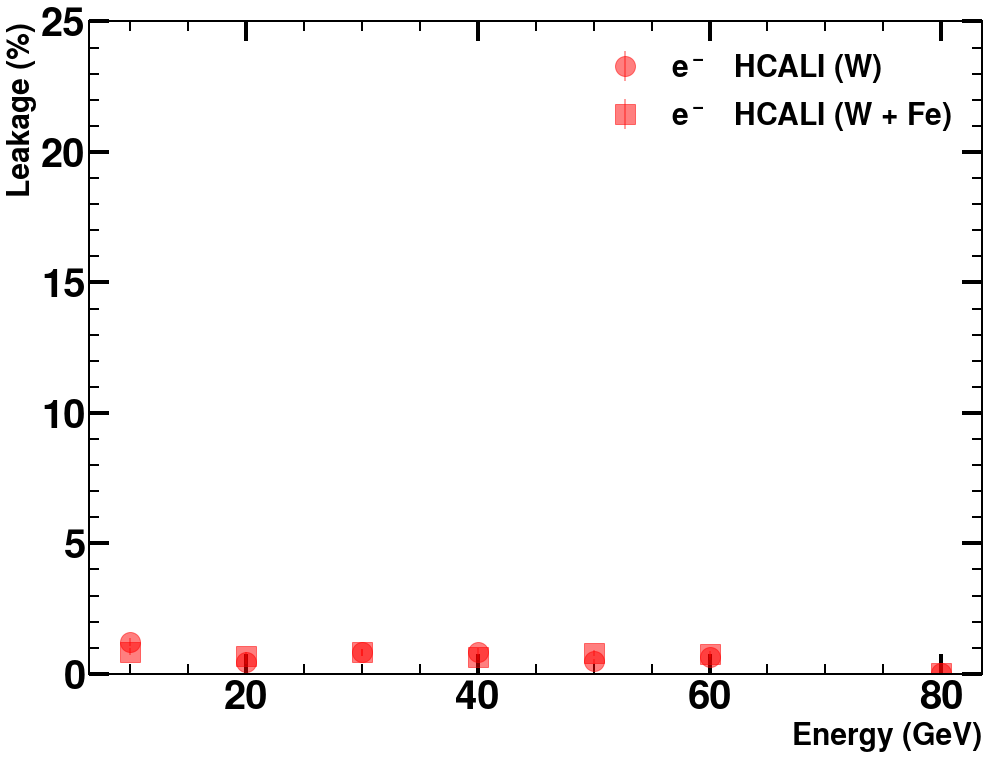

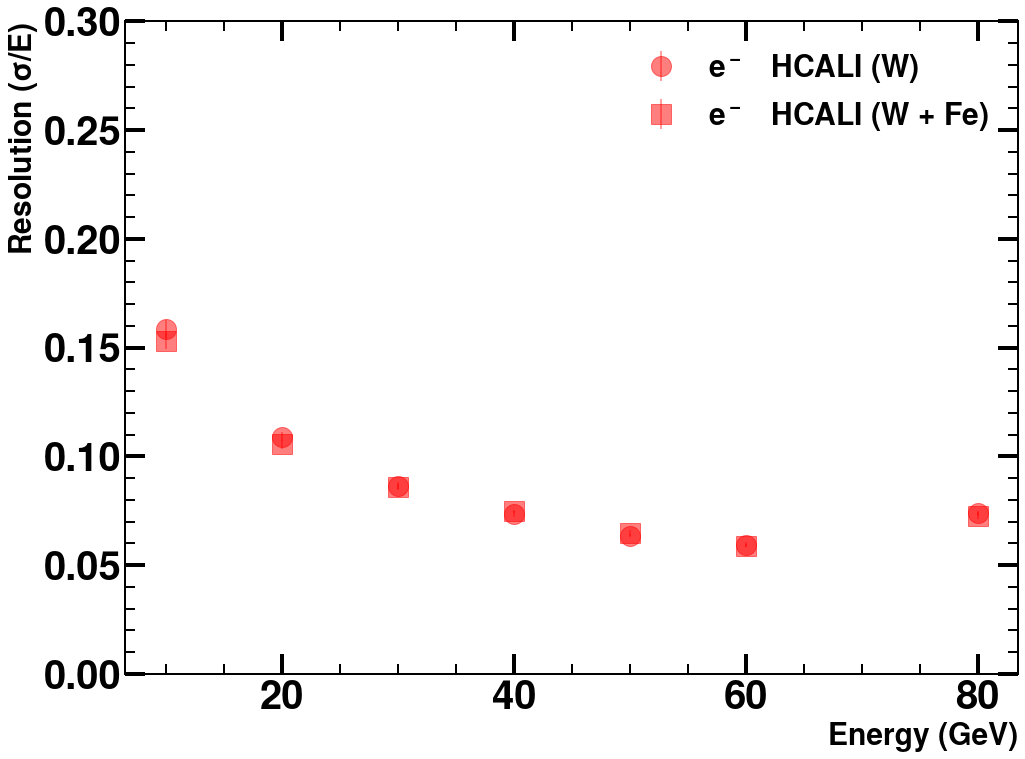

In [38]:
energies_el=[10,20,30,40,50,60,80] 
particles='e-'
get_comp_wFe_W_CALI(particles,energies_el,e_leaks_per_W, e_leaks_per_error_W, e_leaks_per_FeW, e_leaks_per_error_FeW)   

get_comp_wFe_W_CALI(particles,energies_el,e_resolutions_W,e_resolutions_errors_W ,\
                    e_resolutions_FeW,e_resolutions_errors_FeW )  

## Study the leakage with rapidity 

HELLO JELLO 5000
HELLO JELLO 5000


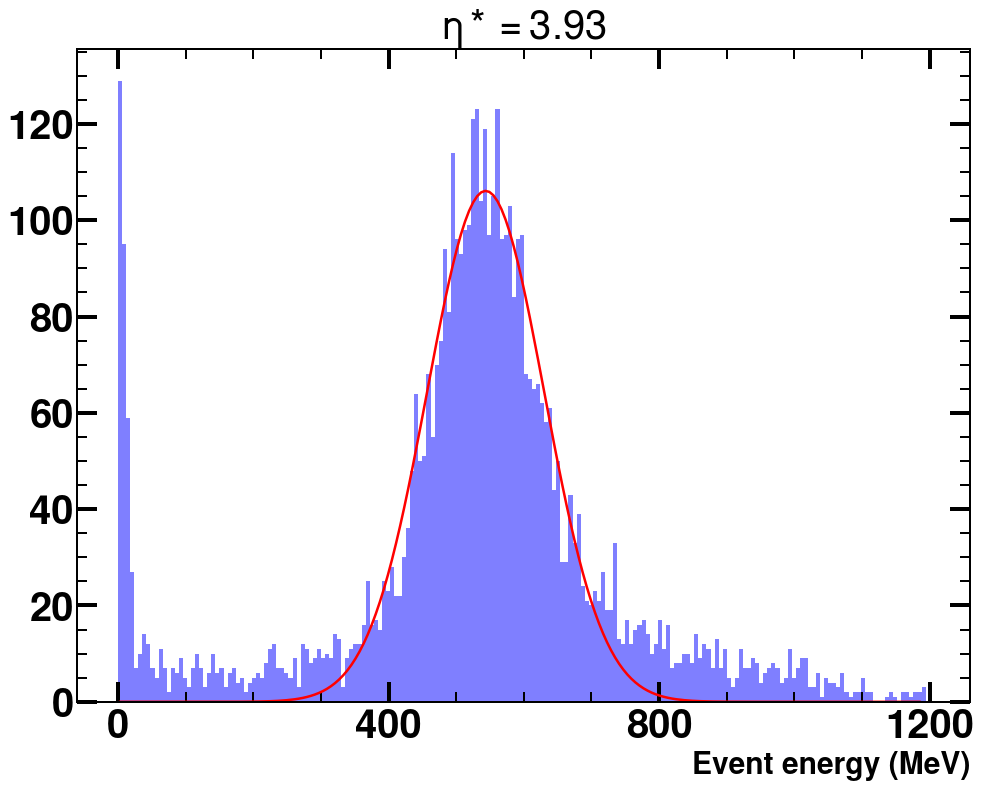

HELLO JELLO 5000
HELLO JELLO 5000


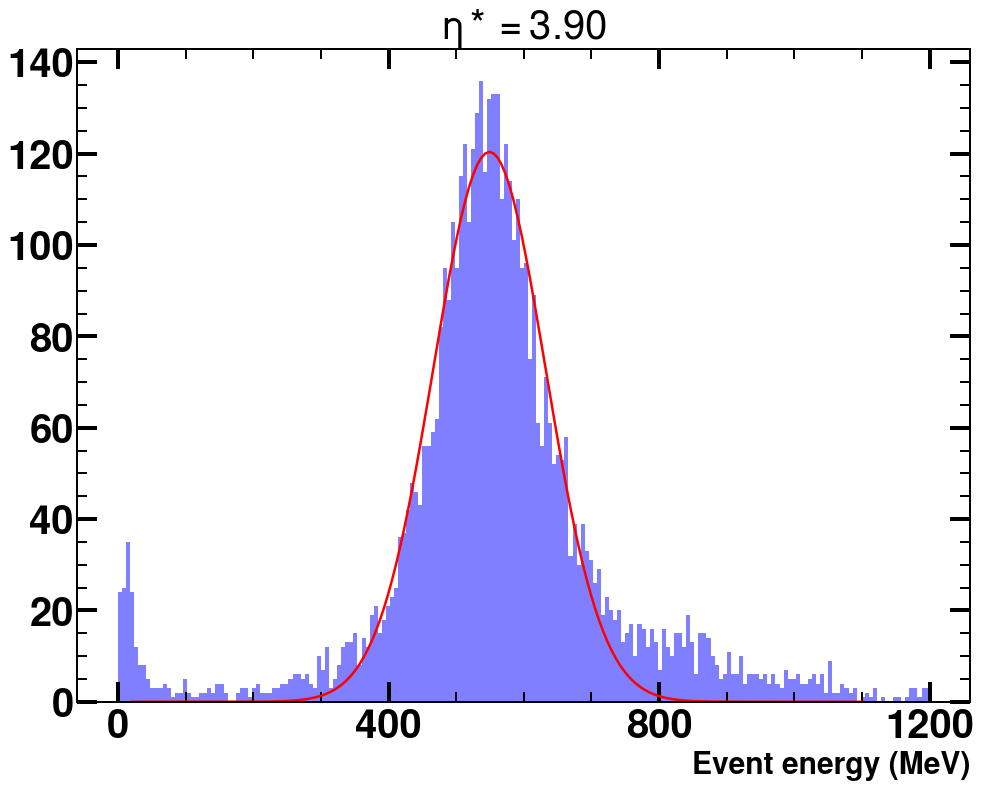

HELLO JELLO 5000
HELLO JELLO 5000


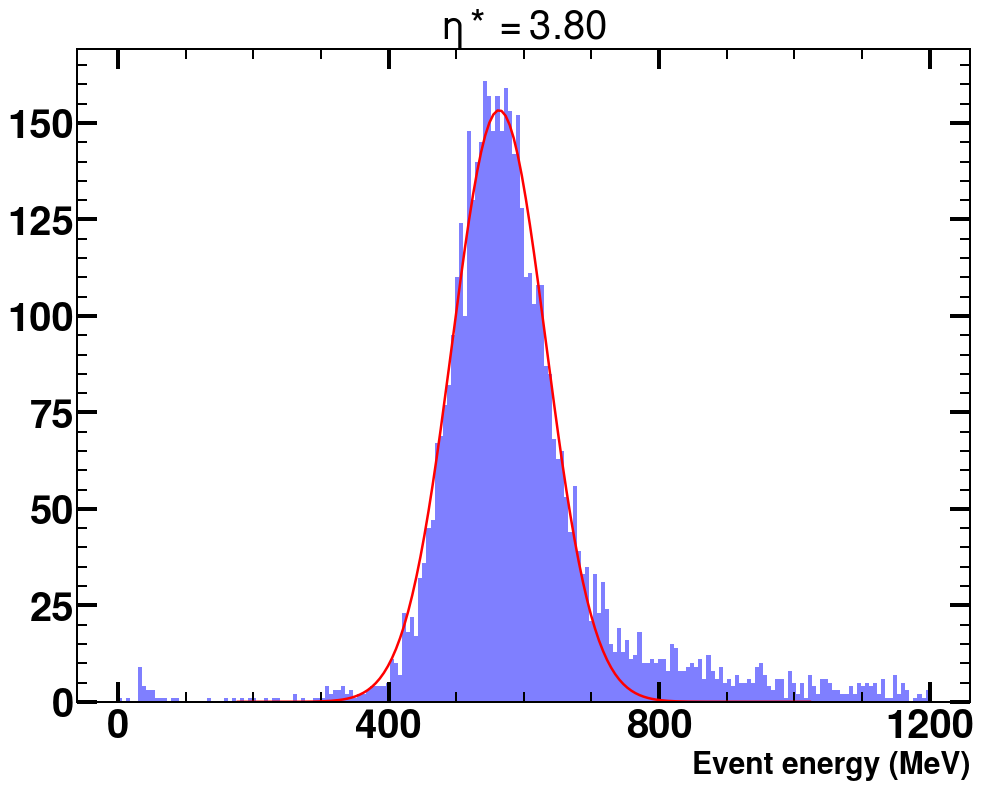

HELLO JELLO 5000
HELLO JELLO 5000


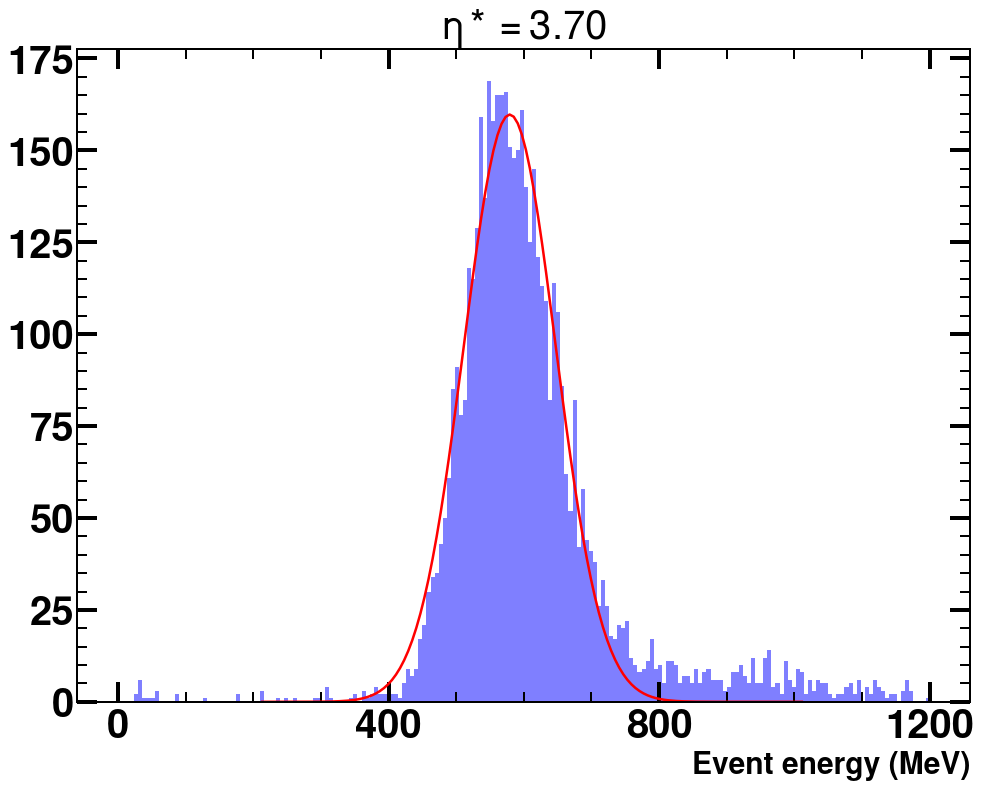

HELLO JELLO 5000
HELLO JELLO 5000


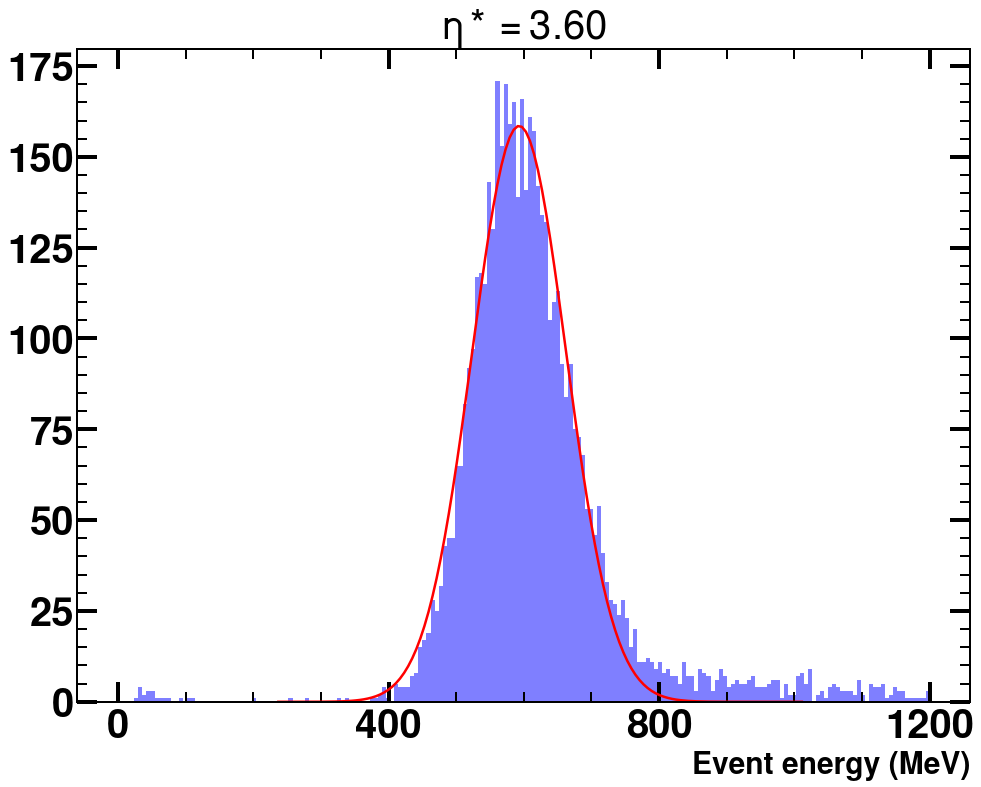

HELLO JELLO 5000
HELLO JELLO 5000


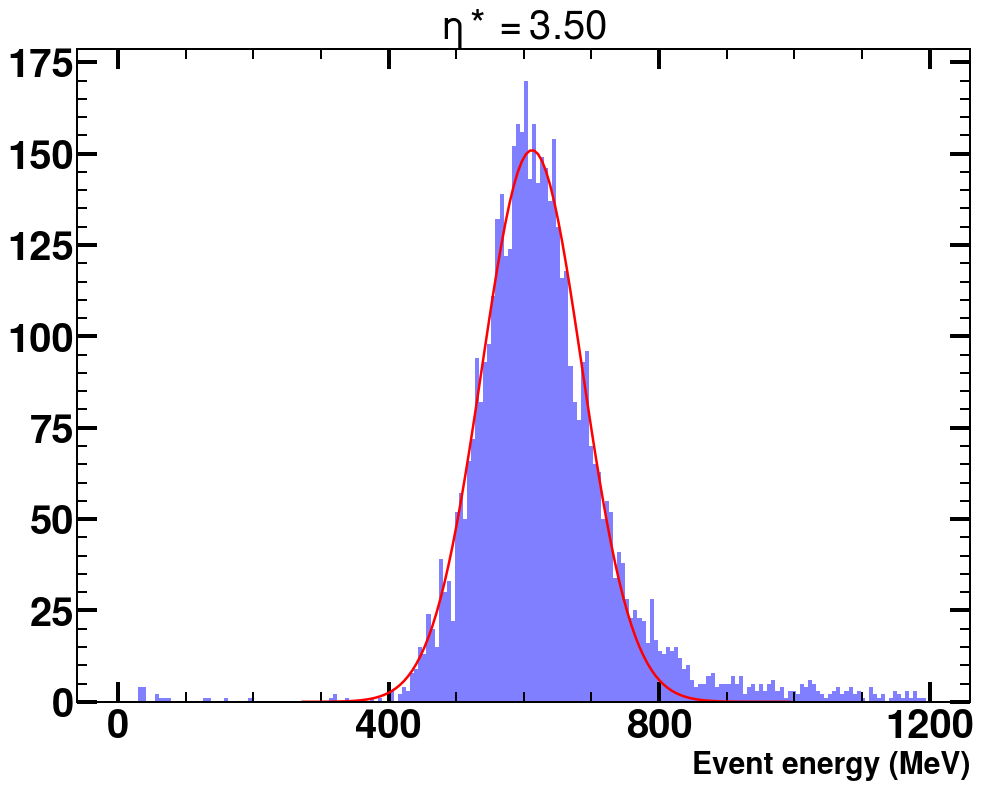

HELLO JELLO 5000
HELLO JELLO 5000


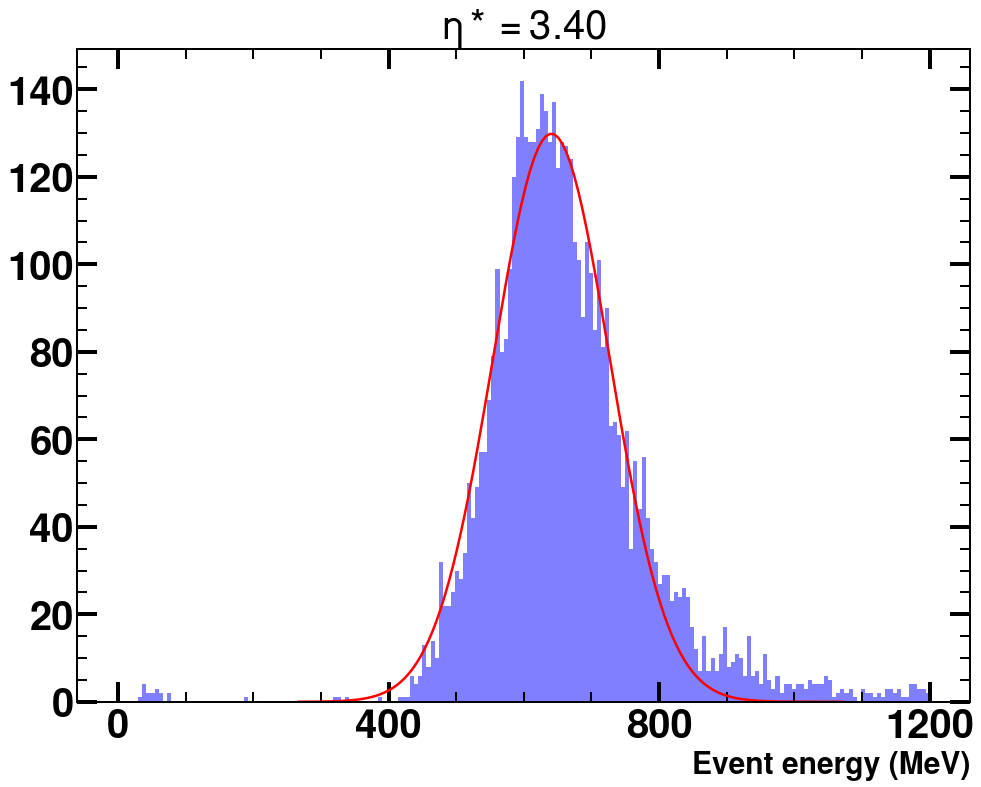

HELLO JELLO 5000
HELLO JELLO 5000


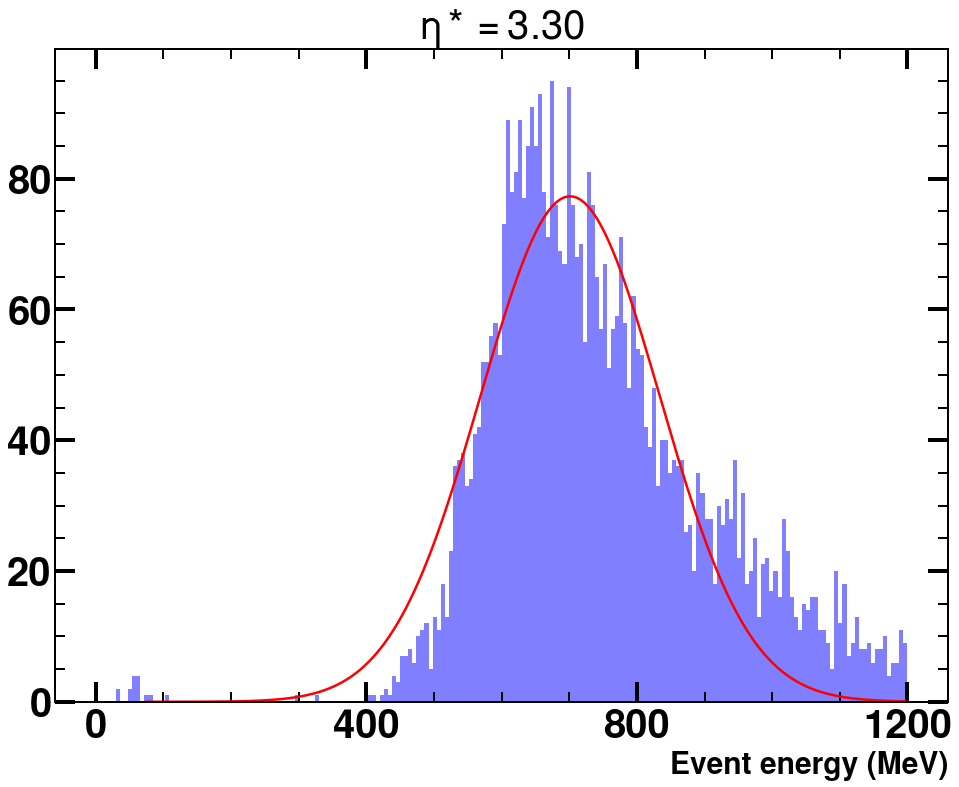

pi_means_thetas_Sum=[543.51,549.15,563.42,579.15,593.06,612.10,640.72,701.28 ]
pi_means_error_thetas_Sum=[3.371,1.561,1.067,1.197,0.997,1.154,1.523,3.631 ]
pi_stds_thetas_Sum=[ 86.57,82.94,69.35,67.86,69.53,73.93,86.02,132.18 ]
pi_stds_error_thetas_Sum=[ 3.371,1.561,1.067,1.197,0.997,1.154,1.523,3.631 ]
pi_leaks_per_thetas_Sum=[ 12.397,5.586,1.306,0.824,0.584,0.462,0.404,0.350 ]
pi_leaks_per_error_thetas_Sum=[ 0.5291,0.3442,0.1630,0.1293,0.1087,0.0967,0.0904,0.0878 ]
pi_resolutions_thetas_Sum=[ 0.15927,0.15104,0.12310,0.11716,0.11724,0.12077,0.13426,0.18848 ]
pi_resolutions_errors_thetas_Sum=[ 0.0063,0.0029,0.0019,0.0021,0.0017,0.0019,0.0024,0.0053 ]


In [10]:
def get_fitted_mean_std():
   
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(1/10 of event is selected)
    #energies=[10,20,30,40,50,60,80,100]
    #energies=[10,20,30,40,50,60,80, 100]
    #fileindex="deg" ## for insert file or HCAL orginal file
    fileindex="deg_Fe-W" ## for insert WITH W 30 LAYER AND FE 20 LAYERS
    if fileindex=='deg':
        prefix='W'
    elif fileindex=='deg_Fe-W':
        prefix='FeW'
    energies=50 
   
    thetas=[2.25, 2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23]
    particle='pi-'
    for ithetas in thetas:
        
        
        
        ## FOR THE HCAL reading
        ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
        phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex,fraction,FilePathReco,energies,ithetas,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        ## READ HCAL 
        ene_wFe_h,time_wFe_h,PosRecoX_wFe_h,PosRecoY_wFe_h,PosRecoZ_wFe_h,mass_wFe_h,mom_wFe_h,energy_gen_wFe_h, \
        phi_wFe_h,ene_good_wFe_h=plots.read_rootfile_HCAL(fileindex,fraction,FilePathReco,energies,ithetas,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        ## RESOLUTION HCAL + HCAL INSERT
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error, pi_resolution,\
        pi_resolution_error=plots.get_resolution_hcalall(ene_good_wFe_h,ene_good_wFe, ithetas, \
                                                         particle,Sigma_For_leakage) 
        
        
        '''      
        ## FOR THE HCAL reading
        ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
        phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex,fraction,FilePathReco,energies,ithetas,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error,\
        pi_resolution,pi_resolution_error=plots.get_resolution(ene_good_wFe, ithetas, particle, Sigma_For_leakage)  
        
        
        '''
        
        
        pi_means.append(pi_mean)
        pi_stds.append(pi_std)
        pi_means_error.append(pi_mean_error)
        pi_stds_error.append(pi_sigma_error)
        pi_resolutions.append(pi_resolution)
        pi_resolution_errors.append(pi_resolution_error)
        pi_leaks_per.append(pi_leak_per)
        pi_leaks_per_error.append(pi_leak_per_error)
        
    plots.print_decimal_pi_update('thetas_Sum', particle, pi_means,  pi_means_error,  pi_stds,pi_stds_error, pi_leaks_per, \
                           pi_leaks_per_error, pi_resolutions, pi_resolution_errors)     
get_fitted_mean_std() 




## Resolution with etas at constant Energy 50 GeV pion

[3.93 3.9  3.8  3.7  3.6  3.5  3.4  3.3 ]


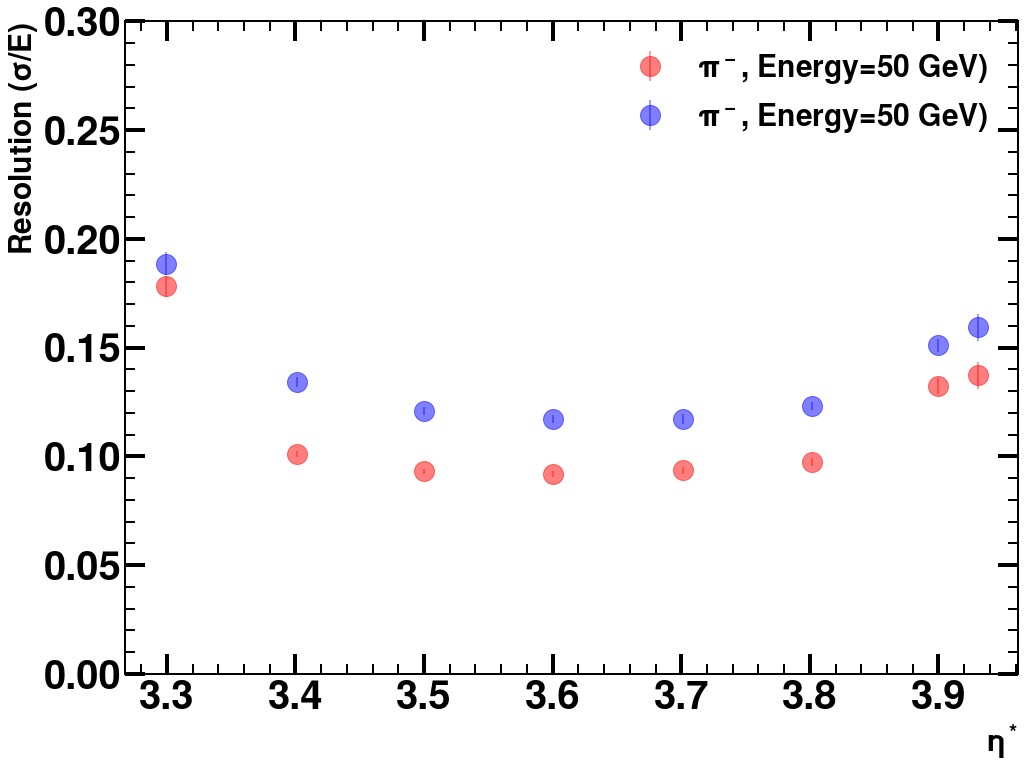

In [6]:
thetas=np.array([2.25, 2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23])
#thetas=[2.25, 2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23]

#  HCAL Insert only
pi_means_thetas=[474.46,480.38,491.69,497.37,497.05,487.31,469.19,423.83 ]
pi_means_error_thetas=[2.884,1.745,0.849,0.799,0.672,0.641,0.649,1.990 ]
pi_stds_thetas=[ 65.13,63.56,47.85,46.50,45.71,45.34,47.42,75.55 ]
pi_stds_error_thetas=[ 2.884,1.745,0.849,0.799,0.672,0.641,0.649,1.990 ]
pi_leaks_per_thetas=[ 26.180,17.900,13.380,10.160,7.380,4.980,4.840,8.460 ]
pi_leaks_per_error_thetas=[ 0.8128,0.6497,0.5508,0.4731,0.3981,0.3234,0.3186,0.4284 ]
pi_resolutions_thetas=[ 0.13727,0.13231,0.09732,0.09350,0.09195,0.09304,0.10108,0.17826 ]
pi_resolutions_errors_thetas=[ 0.0061,0.0037,0.0017,0.0016,0.0014,0.0013,0.0014,0.0048 ]


## HCAL + HCAL Insert
pi_means_thetas_Sum=[543.51,549.15,563.42,579.15,593.06,612.10,640.72,701.28 ]
pi_means_error_thetas_Sum=[3.371,1.561,1.067,1.197,0.997,1.154,1.523,3.631 ]
pi_stds_thetas_Sum=[ 86.57,82.94,69.35,67.86,69.53,73.93,86.02,132.18 ]
pi_stds_error_thetas_Sum=[ 3.371,1.561,1.067,1.197,0.997,1.154,1.523,3.631 ]
pi_leaks_per_thetas_Sum=[ 12.397,5.586,1.306,0.824,0.584,0.462,0.404,0.350 ]
pi_leaks_per_error_thetas_Sum=[ 0.5291,0.3442,0.1630,0.1293,0.1087,0.0967,0.0904,0.0878 ]
pi_resolutions_thetas_Sum=[ 0.15927,0.15104,0.12310,0.11716,0.11724,0.12077,0.13426,0.18848 ]
pi_resolutions_errors_thetas_Sum=[ 0.0063,0.0029,0.0019,0.0021,0.0017,0.0019,0.0024,0.0053 ]



etas=plots.get_eta(thetas)
np.set_printoptions(precision=2)
print(etas)





### Plot the resolution as function of eta (HCAL  only  or HCAL + HCAL Insert

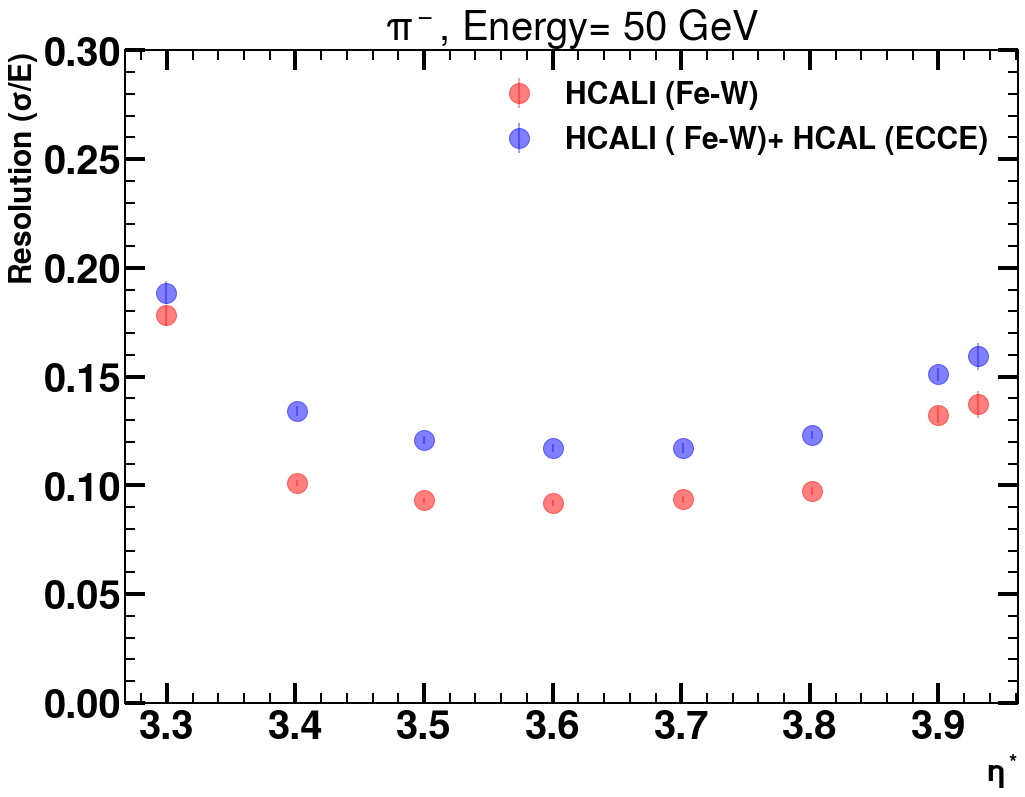

In [11]:
### 

fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(etas,pi_resolutions_thetas, pi_resolutions_errors_thetas ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='HCALI (Fe-W)',linestyle='None')

ax.errorbar(etas,pi_resolutions_thetas_Sum, pi_resolutions_errors_thetas_Sum, alpha=0.5,color="blue",marker='o',markersize=20,\
            label='HCALI ( Fe-W)+ HCAL (ECCE)',linestyle='None')

ax.set_title('$\pi^-$, Energy= 50 GeV')

ax.set_xlabel("$\eta^*$")
ax.set_ylabel('Resolution ($\sigma$/E)')
ax.set_ylim(0,0.30)

plt.legend()
plt.show() 

## Leakage with etas at constant Energy 50 GeV pion

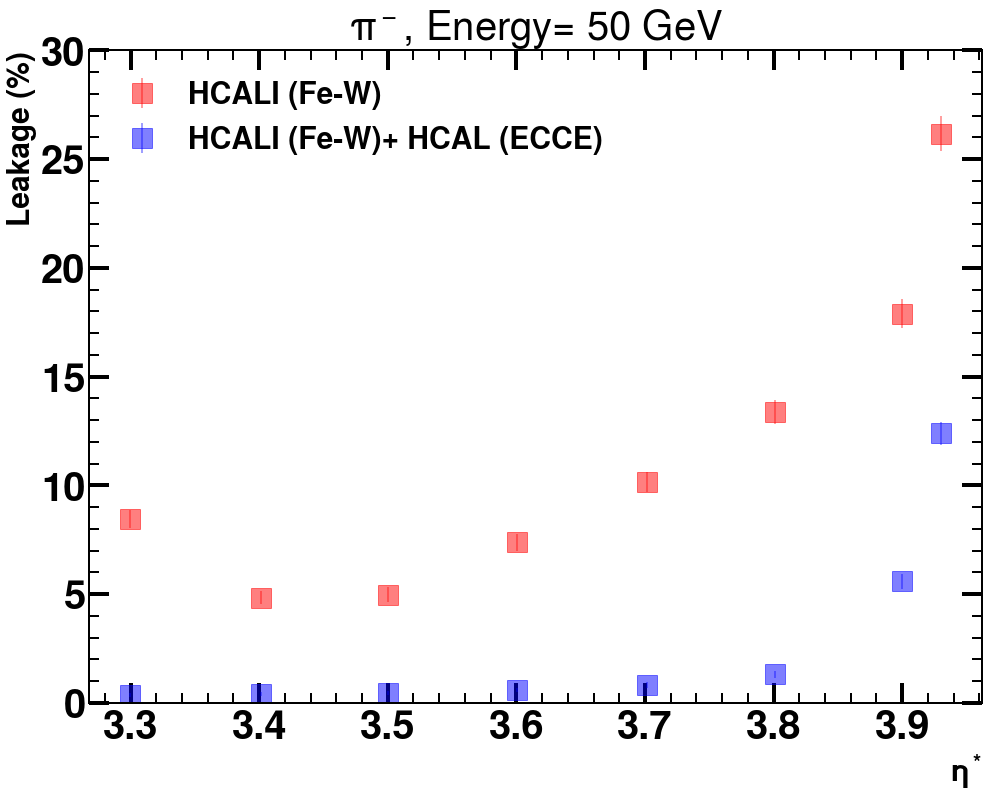

In [12]:
fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(etas,pi_leaks_per_thetas, pi_leaks_per_error_thetas,color="red",alpha=0.5,marker='s',markersize=20,\
            label='HCALI (Fe-W)',linestyle='None' )

ax.errorbar(etas,pi_leaks_per_thetas_Sum, pi_leaks_per_error_thetas_Sum,color="blue",alpha=0.5,marker='s',markersize=20,\
            label='HCALI (Fe-W)+ HCAL (ECCE)',linestyle='None' )

ax.set_title('$\pi^-$, Energy= 50 GeV')
ax.set_xlabel("$\eta^*$")
ax.set_ylabel('Leakage (%)')
ax.set_ylim(0,30)

plt.legend()
plt.show() 

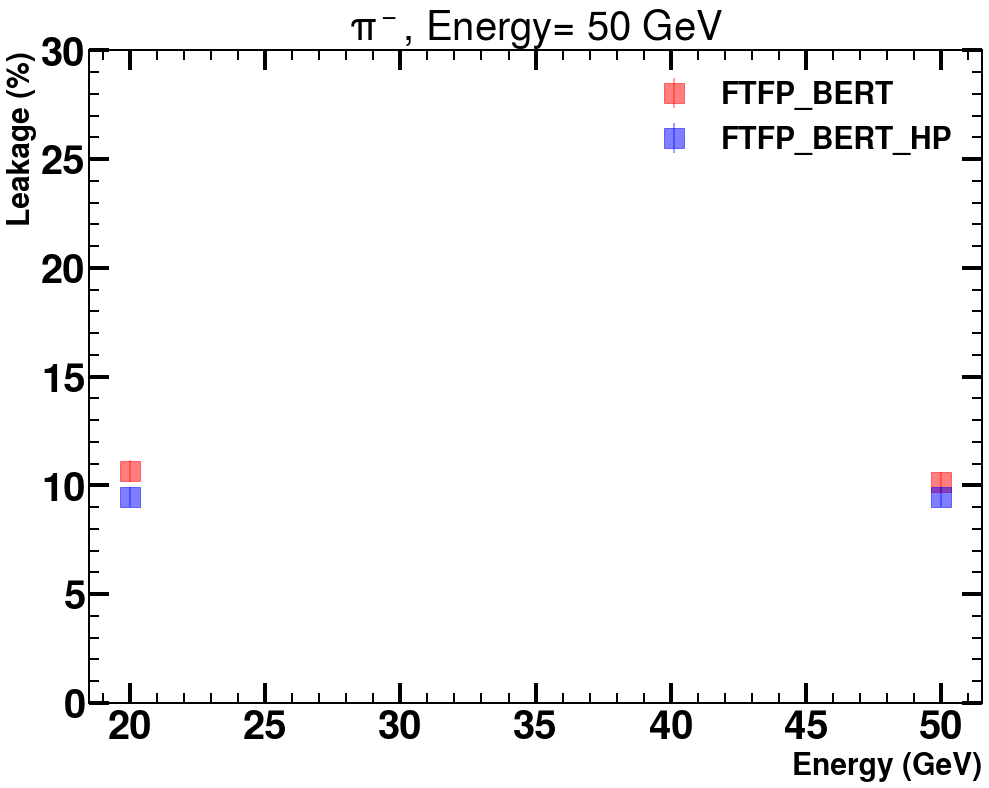

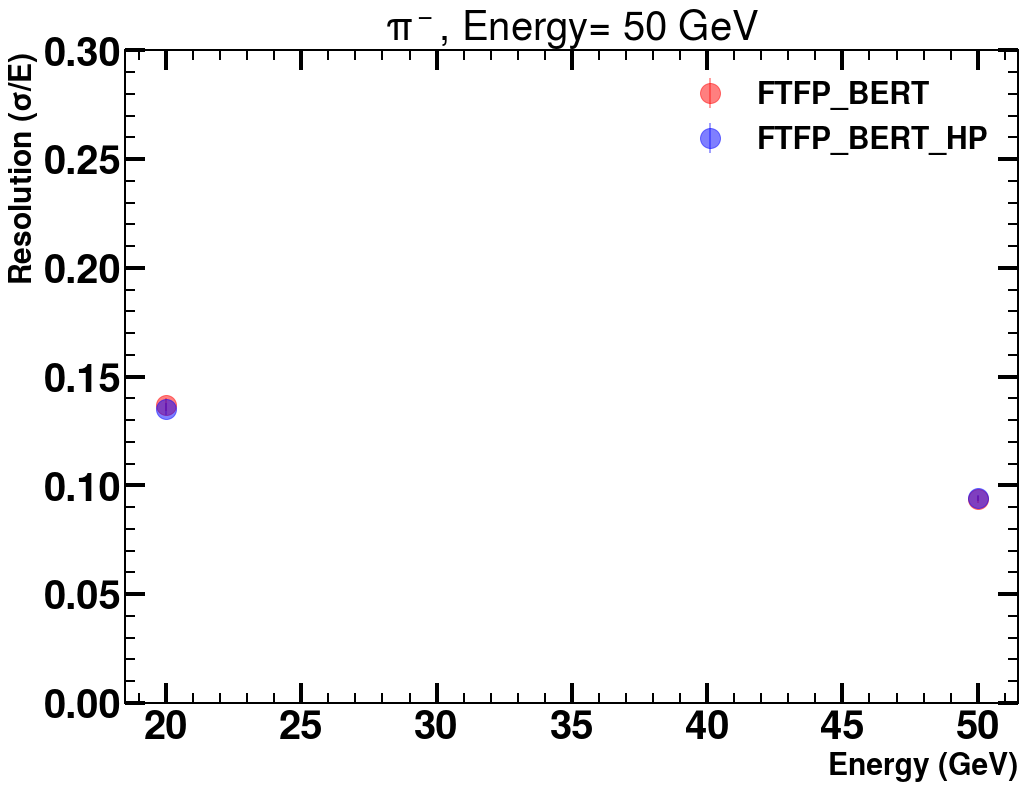

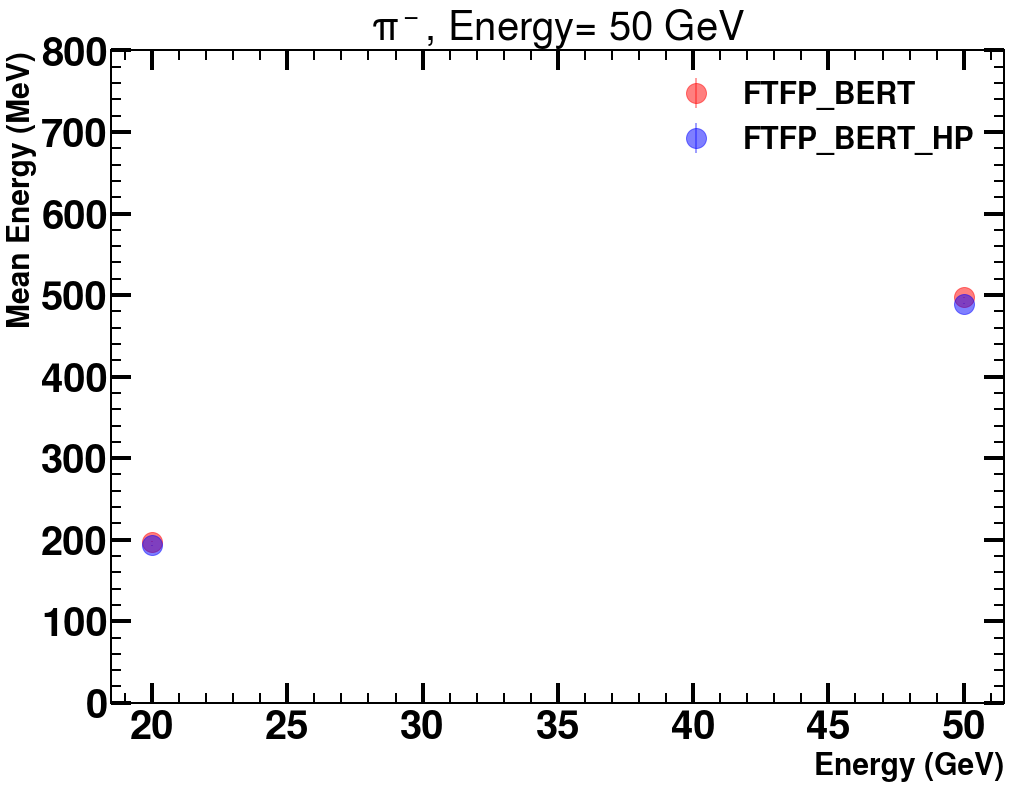

In [32]:
pi_means_No_Hp=[197.61,497.37 ]
pi_means_error_No_Hp=[0.582,0.799 ]
pi_stds_No_Hp=[ 27.08,46.50 ]
pi_stds_error_No_Hp=[ 0.582,0.799 ]
pi_leaks_per_No_Hp=[ 10.660,10.160 ]
pi_leaks_per_error_No_Hp=[ 0.4857,0.4731 ]
pi_resolutions_No_Hp=[ 0.13706,0.09350 ]
pi_resolutions_errors_No_Hp=[ 0.0030,0.0016 ]


pi_means_Hp=[193.38,489.62 ]
pi_means_error_Hp=[0.532,0.687 ]
pi_stds_Hp=[ 26.12,46.07 ]
pi_stds_error_Hp=[ 0.532,0.687 ]
pi_leaks_per_Hp=[ 9.480,9.480 ]
pi_leaks_per_error_Hp=[ 0.4556,0.4556 ]
pi_resolutions_Hp=[ 0.13507,0.09409 ]
pi_resolutions_errors_Hp=[ 0.0028,0.0014 ]

etas=[20, 50]

fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
ax.errorbar(etas,pi_leaks_per_No_Hp, pi_leaks_per_error_No_Hp,color="red",alpha=0.5,marker='s',markersize=20,\
            label='FTFP_BERT',linestyle='None' )

ax.errorbar(etas,pi_leaks_per_Hp, pi_leaks_per_error_Hp,color="blue",alpha=0.5,marker='s',markersize=20,\
            label='FTFP_BERT_HP',linestyle='None' )

ax.set_title('$\pi^-$, Energy= 50 GeV')
ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Leakage (%)')
ax.set_ylim(0,30)

plt.legend()
plt.show() 



fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(etas,pi_resolutions_No_Hp, pi_resolutions_errors_No_Hp ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='FTFP_BERT',linestyle='None')

ax.errorbar(etas,pi_resolutions_Hp, pi_resolutions_errors_Hp, alpha=0.5,color="blue",marker='o',markersize=20,\
            label='FTFP_BERT_HP',linestyle='None')

ax.set_title('$\pi^-$, Energy= 50 GeV')

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Resolution ($\sigma$/E)')
ax.set_ylim(0,0.30)

plt.legend()
plt.show() 


fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)

ax.errorbar(etas,pi_means_No_Hp, pi_means_error_No_Hp ,alpha=0.5,color="red",marker='o',markersize=20,\
            label='FTFP_BERT',linestyle='None')

ax.errorbar(etas,pi_means_Hp, pi_means_error_Hp, alpha=0.5,color="blue",marker='o',markersize=20,\
            label='FTFP_BERT_HP',linestyle='None')

ax.set_title('$\pi^-$, Energy= 50 GeV')

ax.set_xlabel("Energy (GeV)")
ax.set_ylabel('Mean Energy (MeV)')
ax.set_ylim(0,800)

plt.legend()
plt.show() 